<a href="https://colab.research.google.com/github/srigouri/CE888-lab/blob/main/Lab2/Copy_of_bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [1]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np



In [2]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]     

In [3]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Sample from the input array x to create an array of samples of shape (n_bootstraps, sample_size)
# Hint: Check the function random.choice() on Numpy
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. Calculate the mean from each bootstrap (i.e., row) and store it.
# (This should be an array of n_bootstraps values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def bootstrap_mean(x, sample_size, n_bootstraps):
	# <---INSERT YOUR CODE HERE--->
  sample_array = np.random.choice(x,(n_bootstraps,sample_size))
  data_mean = np.mean(sample_array)
  bootstrap_m = np.mean(sample_array,axis=1)
  lower = np.percentile(bootstrap_m,2.5)
  upper = np.percentile(bootstrap_m,97.5)
  return data_mean, lower, upper

In [20]:
bootstrap_mean(data, data.shape[0], 10000)

(9.219178571428571, 6.428571428571429, 12.357142857142858)


Now, modify the bootstrap function you created above so that you can pass your desired confidence interval as a parameter.



In [5]:
from seaborn.utils import ci
def bootstrap_mean_ci(sample, sample_size, n_bootstraps, ci):
 sample_array = np.random.choice(sample,(n_bootstraps,sample_size))
 data_mean = np.mean(sample_array)
 bootstrap_m = np.mean(sample_array,axis=1)
 lower = np.percentile(bootstrap_m,(100-ci)/2)
 upper = np.percentile(bootstrap_m,(100+ci)/2)
 return data_mean, lower, upper

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 50000.0)

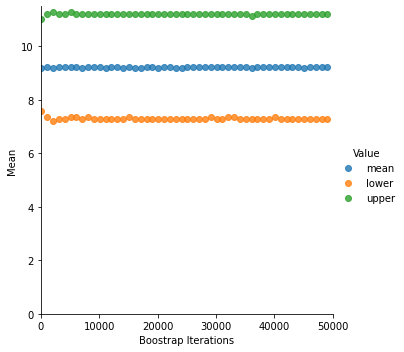

In [6]:
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)

#sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


# Vehicles dataset

Now let's work on a different dataset, which is stored in the vehicles.csv file.


In [7]:
#from google.colab import drive
#drive.mount('/content/drive')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Current fleet  249 non-null    int64  
 1   New Fleet      79 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 4.0 KB


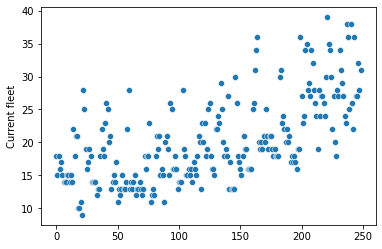

In [8]:
# Load and visualise the vehicles dataset
# To load the dataset: https://neptune.ai/blog/google-colab-dealing-with-files (check section "Load individual files directly from GitHub")
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
df.info()
# Note that the current and new fleets are in different columns and have different lengths, so bear this in mind when you're plotting.
# You can create separate scatterplots for the two fleets, as you would with the histograms, 
# or plot them both in one plot (but not one against the other).
# <---INSERT YOUR CODE HERE--->
sns.scatterplot(data=df['Current fleet'])
sns.histplot()
# Note: you can add more cells as needed to organise your code and your plots


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Current fleet  249 non-null    int64  
 1   New Fleet      79 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 4.0 KB


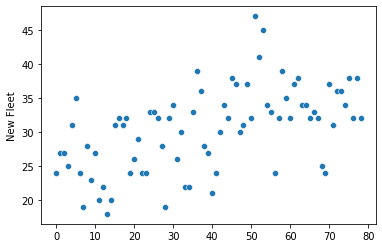

In [9]:
df.info()

sns.scatterplot(data=df['New Fleet'])

## Compare the two fleets

The business analysts come up a comparison algorithm that requires the upper and lower bounds for the mean in order to say which fleet is better.
1. Calculate the mean of both samples.
2. Using the bootstrap function that you created:
    - Construct the 95% CI of the mean of the current fleet.
    - Construct the 95% CI of the mean of the new fleet.
    - Are they comparable? (i.e., is one better than the other?) -- you can do this with a permutation test (check the lecture notes!)

In [10]:
current_fleet_mean = np.mean(df['Current fleet'])
new_fleet_mean = np.mean(df['New Fleet'])
current_fleet_mean, new_fleet_mean

(20.14457831325301, 30.481012658227847)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 50000.0)

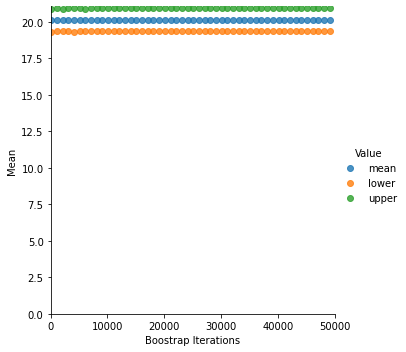

In [11]:
# <---INSERT YOUR CODE HERE--->
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(df['Current fleet'], df['Current fleet'].shape[0], i, 95)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)

In [12]:
new = df.values.T[1]
new=new[np.logical_not(np.isnan(new))] #removing null values
new

array([24., 27., 27., 25., 31., 35., 24., 19., 28., 23., 27., 20., 22.,
       18., 20., 31., 32., 31., 32., 24., 26., 29., 24., 24., 33., 33.,
       32., 28., 19., 32., 34., 26., 30., 22., 22., 33., 39., 36., 28.,
       27., 21., 24., 30., 34., 32., 38., 37., 30., 31., 37., 32., 47.,
       41., 45., 34., 33., 24., 32., 39., 35., 32., 37., 38., 34., 34.,
       32., 33., 32., 25., 24., 37., 31., 36., 36., 34., 38., 32., 38.,
       32.])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 50000.0)

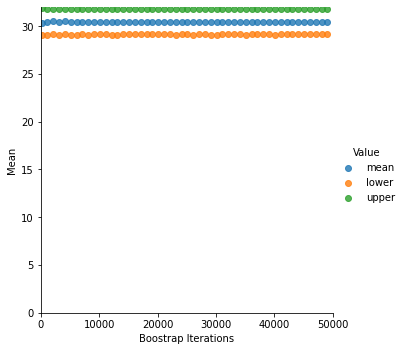

In [13]:
# <---INSERT YOUR CODE HERE--->
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(new, new.shape[0], i, 95)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)

In [14]:
from itertools import count
# Create your own function for a permutation test here (you will need it for the lab quiz!):
def permut_test(sample1, sample2, n_permutations):
    """
    sample1: 1D array
    sample2: 1D array (note that the size of the two arrays can be different)
    n_permutations: number of permutations to calculate the p-value
    """
    count = 0
    for i in range(n_permutations):
      concat = np.concatenate((df['Current fleet'], new))
      perm = np.random.permutation(concat)
      pold = perm[:int(len(perm)/2)]
      pnew = perm[int(len(perm)/2):]
      pnew_mean = np.mean(pnew)
      pold_mean = np.mean(pold)
      tperm = pnew_mean - pold_mean
      tobsrv = new_fleet_mean - current_fleet_mean
      if(tperm>tobsrv):
        count+=1
        pvalue = count/n_permutations
    return pvalue

In [19]:
bootstrap_mean_ci(new, new.shape[0], 10000, 95)

(30.491603797468354, 29.164556962025316, 31.82278481012658)

In [23]:
from seaborn.utils import ci
def bootstrap_std_ci(sample, sample_size, n_bootstraps, ci):
 sample_array = np.random.choice(sample,(n_bootstraps,sample_size))
 data_std = np.std(sample_array)
 bootstrap_std = np.std(sample_array,axis=1)
 lower = np.percentile(bootstrap_std,(100-ci)/2)
 upper = np.percentile(bootstrap_std,(100+ci)/2)
 return data_std, lower, upper

In [24]:
bootstrap_std_ci(data, data.shape[0], 10000, 95)

(5.67927935059025, 2.7152254012497448, 7.403804868485679)

In [25]:
bootstrap_std_ci(df['Current fleet'], df['Current fleet'].shape[0], 10000, 73)

(6.403857741960752, 6.063214596668282, 6.702267947340781)